In [1]:
import numpy as np
import mne
from matplotlib import pyplot as plt 
import os
import load
from paths import paths
import setup
from functions import start_stop_samples_trigg , start_samples_trigg, add_trial_info_to_events, plot_fix_durs_mem_vs,plot_fix_durs_all_phases,closest_tuple,plot_trial

import matplotlib.image as mpimg
import matplotlib.patches as patches
import pandas as pd
#%matplotlib qt
#directory = '/Users/dac/Documents/DATA/SUB_01'


In [2]:
info = setup.exp_info()
info.initialize_logging()
suj  = load.subject(info,'S101')
eeg  = suj.load_analysis_eeg()
eeg  = suj.load_electrode_positions(eeg)
evts = suj.load_event_struct()
bh_data     = suj.load_bh_csv()
evts = add_trial_info_to_events(evts,bh_data,100)




Ｌｏａｄｉｎｇ ＥＥＧ ｄａｔａ．．．．．
        ｓｕｂｊｅｃｔ   Ｓ１０１

Reading /Volumes/DAC1T/Hybrid/Hybrid_preana_out/8.data_analysis/S101_analysis.fdt
Reading 0 ... 1769499  =      0.000 ...  3538.998 secs...


/Users/dac/Documents/repos/MNEdeconv/load.py:221: RuntimeWarning: Unknown types found, setting as type EEG:
eye: ['R-AREA', 'R-GAZE-X', 'R-GAZE-Y', 'TIME']
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)
/Users/dac/Documents/repos/MNEdeconv/load.py:221: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)
/Users/dac/Documents/repos/MNEdeconv/load.py:221: RuntimeWarning: Not setting positions of 8 misc channels found in montage:
['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)



Ｌｏａｄｉｎｇ ｅｖｅｎｔｓ ｄａｔａ．．．．．
        ｆｒｏｍ

/Ｖｏｌｕｍｅｓ/ＤＡＣ１Ｔ/Ｈｙｂｒｉｄ/Ｈｙｂｒｉｄ_ｐｒｅａｎａ_ｏｕｔ/９．ｅｖｅｎｔ_ｓｔｒｕｃｔｓ/Ｓ１０１_ｅｖｅｎｔｓ．ｃｓｖ


Ｌｏａｄｉｎｇ ｂｅｈａｖｉｏｕｒａｌ ｄａｔａ．．．．．
            ｆｒｏｍ   [＇１０１_ｈｙｂｒｉｄ_ｓｅａｒｃｈ_ｂｕｉｌｄｅｒ_ｃｏｄｅ_２０２１_Ｎｏｖ_２３_１０２１．ｃｓｖ＇]

percentage of correct answers : 65.2
fixations in cross1 phase : 155

fixations in mem phase    : 2207

fixations in cross2 phase : 484

fixations in vs phase     : 5457

saccade     9956
fixation    9862
cross1       210
mem          210
cross2       210
vs           210
bad_ET       116
Name: type, dtype: int64
total fixations on items    : 4663
fixations on targets  : 303
fixations on distractors  : 4360
percentage of capture fixations in vs 85.4%



Ｌｏａｄｉｎｇ ｂｅｈａｖｉｏｕｒａｌ ｄａｔａ．．．．．
            ｆｒｏｍ   [＇１０１_ｈｙｂｒｉｄ_ｓｅａｒｃｈ_ｂｕｉｌｄｅｒ_ｃｏｄｅ_２０２１_Ｎｏｖ_２３_１０２１．ｃｓｖ＇]


Ｌｏａｄｉｎｇ ｅｖｅｎｔｓ ｄａｔａ．．．．．
        ｆｒｏｍ

/Ｖｏｌｕｍｅｓ/ＤＡＣ１Ｔ/Ｈｙｂｒｉｄ/Ｈｙｂｒｉｄ_ｐｒｅａｎａ_ｏｕｔ/９．ｅｖｅｎｔ_ｓｔｒｕｃｔｓ/Ｓ１０１_ｅｖｅｎｔｓ．ｃｓｖ



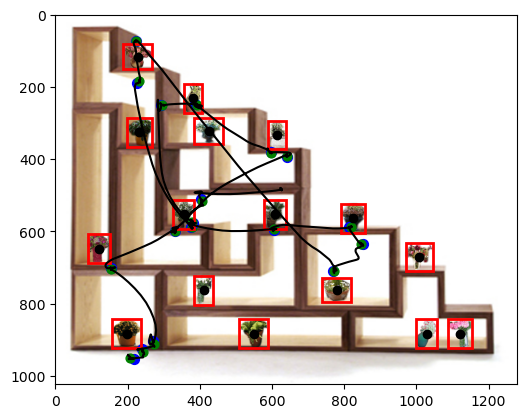

In [4]:
plot_trial(eeg,suj,31)

In [8]:
#df
#target_files.iloc[tr-1]
trial_stims#['stm']
#image_name
#tr
#np.where(bh_data['searchimage']== 'cmp_'+image_name+'.jpg')
#len(pos)
image_names = bh_data['searchimage'].drop_duplicates().str.split('cmp_', expand=True)[1].str.split('.jpg', expand=True)[0].to_list()
#trial_stims = df[df['folder']==image_name]
#records = trial_stims.to_records(index=False)
image_name   = image_names[tr-1]
trial_stims  = df[df['folder']==image_name]
records = trial_stims.to_records(index=False)
item_pos = [(record[6]+record[5]/2, record[7]+record[4]/2) for record in records]
# Extract the (x, y) values from each record as a tuple using a list comprehension
flag, closest_id = closest_tuple(item_pos, 90, (311.5, 474.0))
print(flag,closest_id)

targets  = bh_data.loc[::6,['st5']] #first column has image name and second T/A(absent)
target_files = targets['st5'].str.lstrip('memstim').str.lstrip('/')[:-1] #target filenames
trial_stims['stm']
image_name

img=mpimg.imread(exp_path + 'cmp_' + image_name + '.jpg')
(screensize[0]-img.shape[1])/2
image_names

tr

False None


2

In [29]:
#make epochs from fixations in different experimental phases
ev_fix = evts[(evts['type']=='fixation') & (evts['phase']=='vs') & (evts['ondistractor']==1)]
#ev_fix = ev_fix.iloc[np.where(ev_fix['latency'].diff()>50)] #limit overlap
event = [ (np.int(record[1]),0,1) for record in  ev_fix.to_records(index=False) if 600>record[3]>100]
epochs = mne.Epochs(eeg, event, tmin=-0.2, tmax=0.3, reject_by_annotation=True,
                    preload=True)
#epochs.plot_drop_log()



Not setting metadata
1597 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1597 events and 251 original time points ...


/var/folders/gf/gp61rxzn3pz1rqw464l71d7w0000gn/T/ipykernel_52428/2060882060.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  event = [ (np.int(record[1]),0,1) for record in  ev_fix.to_records(index=False) if 600>record[3]>100]


2 bad epochs dropped


In [30]:
#epochs['1'].plot_image(picks='B9', combine='mean')

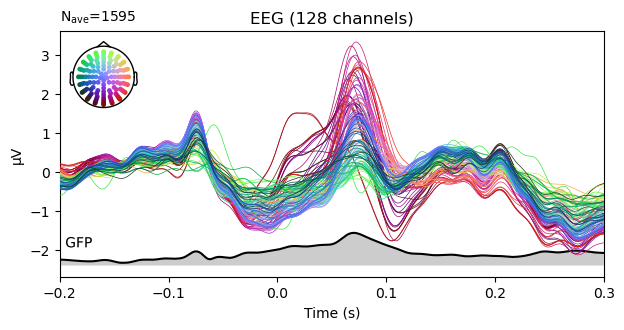

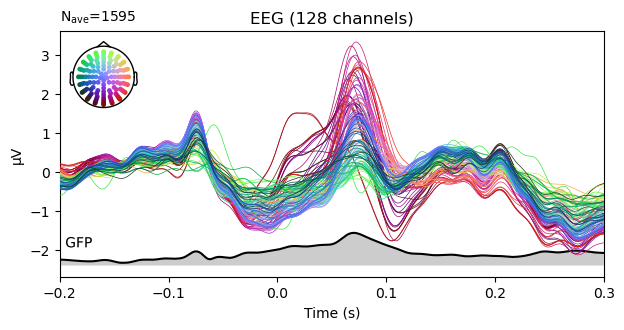

In [32]:
%matplotlib inline
#%matplotlib qt
evoked = epochs.average(picks=range(128))
# Plot the average response for each channel in the same figure
evoked.plot(spatial_colors=True, gfp=True)

In [6]:
np.where(ev_fix['latency'].diff()>80)

NameError: name 'ev_fix' is not defined

In [7]:
#check duration of each phase , make function to see all the results as a df
xstar_samp, xstop_samp = start_stop_samples_trigg(evts,'cross1')
(xstop_samp-xstar_samp)/500


array([0.75 , 0.75 , 0.75 , 0.752, 0.75 , 0.752, 0.75 , 0.75 , 0.75 ,
       0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.75 , 0.752, 0.75 , 0.75 ,
       0.75 , 0.752, 0.75 , 0.75 , 0.752, 0.75 , 0.75 , 0.75 , 0.75 ,
       0.75 , 0.75 , 0.752, 0.752, 0.75 , 0.75 , 0.752, 0.75 , 0.75 ,
       0.75 , 0.75 , 0.75 , 0.752, 0.752, 0.75 , 0.75 , 0.75 , 0.75 ,
       0.75 , 0.75 , 0.75 , 0.752, 0.752, 0.752, 0.75 , 0.75 , 0.714,
       0.75 , 0.632, 0.746, 0.642, 0.71 , 0.696, 0.582, 0.66 , 0.558,
       0.642, 0.57 , 0.626, 0.532, 0.592, 0.51 , 0.556, 0.47 , 0.402,
       0.386, 0.474, 0.38 , 0.432, 0.324, 0.414, 0.326, 0.384, 0.308,
       0.338, 0.256, 0.322, 0.154, 0.184, 0.206, 0.104, 0.22 , 0.102,
       0.144, 0.15 , 0.058, 0.036, 0.142, 0.032, 0.002, 0.042, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.   , 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002,

In [11]:
#epochs.plot_image(picks=range(128), combine='gfp')

In [10]:
eeg.annotations

<Annotations | 20144 segments: 250 (210), bad_ET (116), fixation (9862), ...>

In [79]:
is_close_to_any_point(point[0], point[1], tuples, threshold)

(True, array([0]))

In [8]:
eeg.plot_sensors(ch_type='eeg', axes=ax2d)

NameError: name 'ax2d' is not defined

In [230]:
 evts[evts['latency']==i][['fix_avgpos_x','fix_avgpos_y']]

,fix_avgpos_x,fix_avgpos_y
20770,921.710205,454.382111


In [211]:
keyRight  =bh_data.loc[::6,'corrAns'][:-1]=='right'
presents = list(bh_data.loc[::6,'st5_cat']=='T')
sum(presents[:-1]==keyRight)
pp=pd.DataFrame({'preset':presents[:-1],'key':keyRight})
pp

,preset,key
0,False,False
6,True,True
12,True,True
18,True,True
24,True,True
...,...,...
1230,True,True
1236,True,True
1242,False,False
1248,False,False


In [212]:
sum(presents[:-1])
len(presents[:-1])

210

In [213]:
sum(keyRight)
len(keyRight)

210

In [15]:
pp[~( presents[:-1]==keyRight)]
#cmp_shelves_108_teddybear_021.jpg
#cmp_building_057_dog_014.jpg
#REMEMBER CORR ANS IS WRONG FOR THIS TWO
#and 
#Dog1962 T and cmp_meadow_001_dog_001 IT IS NOT target present I mean , the presumed target is not present in the imagesearch
#it should be hardcoded as Absent condition always




NameError: name 'pp' is not defined

In [159]:
trial_stims[trial_stims['stm']==target_files.iloc[tr-1]][['pos_x','pos_y']].to_records(index=False)

rec.array([],
          dtype=[('pos_x', '<i8'), ('pos_y', '<i8')])

In [19]:
paths().results_path()

'/Volumes/DAC1T/Hybrid/Hybrid_ana_out/'